In [1]:
import pickle
with open("spreadsheet_boolean.pkl", "rb") as f:
    df = pickle.load(f)

C:\Users\aswan\AppData\Local\Temp\ipykernel_25092\2884683019.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.set_index('date',inplace=True)

In [4]:
df.head()

,symbol,streak_len,direction,occurrence,performance,vol,ma5_pos,ma10_pos,ma20_pos,ma50_pos,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual,bin_name
date,,,,,,,,,,,,,,,,,,,,
2024-12-18,MIGI,4,-1,46,-1,1,0,0,0,0,0,0,-1,1,1,-1,-1,-1,0,4 -1 -1 -1 1 0 0 -1 -1
2024-12-18,PSNY,7,-1,8,1,1,0,0,0,0,0,0,1,1,-1,1,-1,-1,0,7 -1 1 1 1 0 0 1 -1
2024-12-18,AVNW,3,-1,536,1,1,0,0,1,0,0,0,-1,-1,0,1,1,1,0,3 -1 1 1 1 0 0 -1 1
2024-12-18,ANIP,3,-1,334,1,1,0,0,0,0,0,0,1,-1,-1,-1,1,1,0,3 -1 1 1 1 0 0 1 1
2024-12-18,GOODO,5,-1,10,1,-1,0,0,0,0,0,1,1,-1,1,-1,-1,0,0,5 -1 1 1 -1 0 1 1 0


In [5]:
df['next_day_actual'].value_counts()

next_day_actual
-1    1048978
 1    1041991
 0      98675
Name: count, dtype: int64

In [6]:
df = df[df['next_day_actual'] != 0]

In [7]:
df.shape

(2090969, 20)

In [8]:
df.dtypes

symbol             object
streak_len         object
direction           int64
occurrence         object
performance         int64
vol                 int64
ma5_pos             int64
ma10_pos            int64
ma20_pos            int64
ma50_pos            int64
ma100_pos           int64
ma200_pos           int64
ma5_neg             int64
ma10_neg            int64
ma20_neg            int64
ma50_neg            int64
ma100_neg           int64
ma200_neg           int64
next_day_actual     int64
bin_name           object
dtype: object

In [9]:
df['streak_len'] = df['streak_len'].astype(int)
# df['occurrence'] = df['occurrence'].astype(int)
df.drop(columns=['symbol','bin_name','occurrence'],inplace=True)
df.head()

,streak_len,direction,performance,vol,ma5_pos,ma10_pos,ma20_pos,ma50_pos,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual
date,,,,,,,,,,,,,,,,,
2024-12-17,3,1,-1,1,0,0,0,0,0,1,1,1,-1,1,-1,0,-1
2024-12-17,6,-1,1,-1,0,0,0,0,0,0,1,-1,-1,-1,-1,1,-1
2024-12-17,3,1,-1,1,-1,1,1,1,1,1,0,0,0,0,0,0,1
2024-12-17,3,1,-1,1,-1,0,0,0,0,0,0,1,-1,-1,1,1,1
2024-12-17,4,-1,1,-1,0,0,0,0,0,0,-1,1,1,1,-1,-1,-1


In [10]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df['next_day_actual']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

### One Hot Encoding all the columns

In [11]:
cols = x.columns.to_list()
cols

['streak_len',
 'direction',
 'performance',
 'vol',
 'ma5_pos',
 'ma10_pos',
 'ma20_pos',
 'ma50_pos',
 'ma100_pos',
 'ma200_pos',
 'ma5_neg',
 'ma10_neg',
 'ma20_neg',
 'ma50_neg',
 'ma100_neg',
 'ma200_neg']

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[cols])
encoded_cols = list(encoder.get_feature_names_out(cols))

In [13]:
x_train[encoded_cols] = encoder.transform(x_train[cols])
x_test[encoded_cols] = encoder.transform(x_test[cols])

In [14]:
x_train.columns

Index(['streak_len', 'direction', 'performance', 'vol', 'ma5_pos', 'ma10_pos',
       'ma20_pos', 'ma50_pos', 'ma100_pos', 'ma200_pos', 'ma5_neg', 'ma10_neg',
       'ma20_neg', 'ma50_neg', 'ma100_neg', 'ma200_neg', 'streak_len_3',
       'streak_len_4', 'streak_len_5', 'streak_len_6', 'streak_len_7',
       'streak_len_8', 'streak_len_9', 'streak_len_10', 'streak_len_11',
       'streak_len_12', 'streak_len_13', 'streak_len_14', 'streak_len_15',
       'streak_len_16', 'streak_len_17', 'streak_len_18', 'streak_len_19',
       'streak_len_20', 'streak_len_21', 'streak_len_22', 'streak_len_23',
       'streak_len_24', 'streak_len_25', 'direction_-1', 'direction_1',
       'performance_-1', 'performance_0', 'performance_1', 'vol_-1', 'vol_0',
       'vol_1', 'ma5_pos_-1', 'ma5_pos_0', 'ma5_pos_1', 'ma10_pos_-1',
       'ma10_pos_0', 'ma10_pos_1', 'ma20_pos_-1', 'ma20_pos_0', 'ma20_pos_1',
       'ma50_pos_-1', 'ma50_pos_0', 'ma50_pos_1', 'ma100_pos_-1',
       'ma100_pos_0', 'ma100_pos_1

In [15]:
print(x_train.shape)
print(x_test.shape)

(1672775, 83)
(418194, 83)


In [16]:
x_train = x_train[encoded_cols]
x_test = x_test[encoded_cols]

### Converting encoded columns to boolean

In [17]:
# Create DataFrames with the encoded data
x_train_encoded_df = pd.DataFrame(x_train, columns=encoded_cols, index=x_train.index)
x_test_encoded_df = pd.DataFrame(x_test, columns=encoded_cols, index=x_test.index)

In [18]:
x_train_encoded_df = x_train_encoded_df.astype(bool)
x_test_encoded_df = x_test_encoded_df.astype(bool)
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

In [19]:
x_train_encoded_df.head()

,streak_len_3,streak_len_4,streak_len_5,streak_len_6,streak_len_7,streak_len_8,streak_len_9,streak_len_10,streak_len_11,streak_len_12,...,ma20_neg_1,ma50_neg_-1,ma50_neg_0,ma50_neg_1,ma100_neg_-1,ma100_neg_0,ma100_neg_1,ma200_neg_-1,ma200_neg_0,ma200_neg_1
date,,,,,,,,,,,,,,,,,,,,,
2009-10-22,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2015-11-02,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2022-07-08,False,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,True
2019-05-17,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2019-08-21,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) 
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [21]:
model.score(x_train,y_train)

1.0

In [22]:
model.score(x_test,y_test)

1.0

In [23]:
importance_df = pd.DataFrame({
    'Feature':x_train.columns, 
    'Importance':model.feature_importances_
}).sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
0,streak_len_3,0.0
1,streak_len_4,0.0
2,streak_len_5,0.0
3,streak_len_6,0.0
4,streak_len_7,0.0
...,...,...
62,ma100_neg_0,0.0
63,ma100_neg_1,0.0
64,ma200_neg_-1,0.0
65,ma200_neg_0,0.0


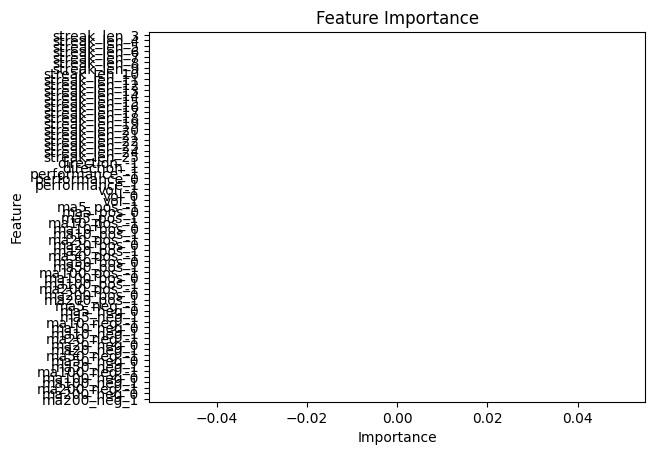

In [24]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='Importance', y='Feature');

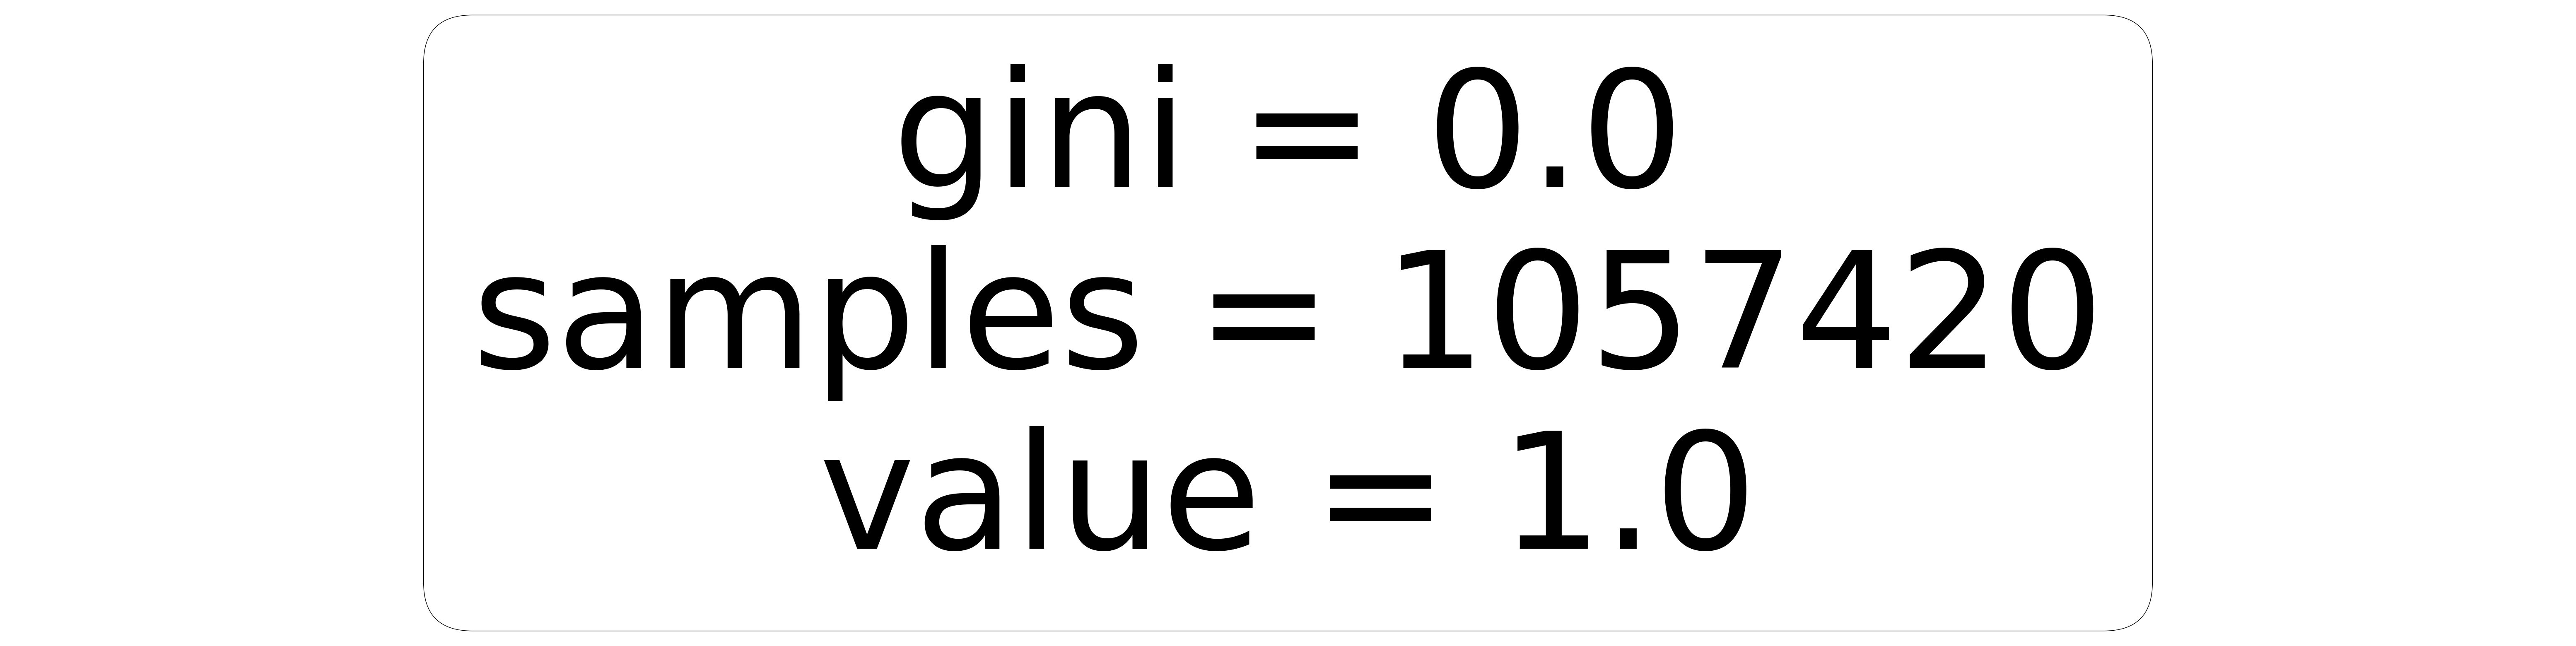

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], feature_names=x_train.columns, max_depth=2, filled=True, rounded=True, class_names=[str(cls) for cls in model.classes_]);
# model.estimator[] selects from different decision trees

In [26]:
# helper function to make it easy to test hyperparameters
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return model.score(x_train, y_train), model.score(x_test, y_test)

In [27]:
test_params(max_depth=5)

(1.0, 1.0)

In [28]:
test_params(max_depth=12)

(1.0, 1.0)

In [ ]:
x_train.head()

,streak_len_3,streak_len_4,streak_len_5,streak_len_6,streak_len_7,streak_len_8,streak_len_9,streak_len_10,streak_len_11,streak_len_12,...,ma20_neg_1,ma50_neg_-1,ma50_neg_0,ma50_neg_1,ma100_neg_-1,ma100_neg_0,ma100_neg_1,ma200_neg_-1,ma200_neg_0,ma200_neg_1
date,,,,,,,,,,,,,,,,,,,,,
2009-10-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2015-11-02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2022-07-08,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2019-05-17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2019-08-21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
